# Calculate Monthly Sea Ice extent

Calculate historical sea ice extent and save

In [1]:
#useful py libraries
import xarray as xr
import numpy as np

# Open the dataset

Using the NSIDC Sea Ice Concentration gridded data set

In this case, looking at the long-term monthly averages of sea ice concentration

In [4]:
cdr_xr = xr.open_dataset(
    '/g/data/jk72/MIZ/sidads.colorado.edu/DATASETS/NOAA/G02202_V4/south/aggregate/seaice_conc_monthly_sh_197811_202112_v04r00.nc',
)

cdr_xr = cdr_xr.swap_dims({'tdim':'time'})

# Calculate extent and save

In [6]:
cdr_xr

<xarray.Dataset>
Dimensions:                           (time: 518, y: 332, x: 316)
Coordinates:
  * time                              (time) datetime64[ns] 1978-11-01 ... 20...
    xgrid                             (x) float32 ...
    ygrid                             (y) float32 ...
Dimensions without coordinates: y, x
Data variables:
    cdr_seaice_conc_monthly           (time, y, x) float32 ...
    nsidc_bt_seaice_conc_monthly      (time, y, x) float32 ...
    nsidc_nt_seaice_conc_monthly      (time, y, x) float32 ...
    projection                        |S1 ...
    qa_of_cdr_seaice_conc_monthly     (time, y, x) float32 ...
    stdev_of_cdr_seaice_conc_monthly  (time, y, x) float32 ...
    latitude                          (y, x) float32 ...
    longitude                         (y, x) float32 ...
Attributes: (12/40)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc_monthly
    metadata_link:             https://nsidc.org/data/g02202/versions/4/
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-22T15:54:57Z
    time_coverage_start:       1978-11-01T00:00:00Z
    time_coverage_end:         2021-12-31T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...

In [28]:
# sea ice extent
extent_ds = (cdr_xr.cdr_seaice_conc_monthly>=0.15)

In [29]:
#add the long and lat back in for reference
extent_ds=xr.merge([cdr_conc_da, cdr_xr.latitude, cdr_xr.longitude])

#and some descriptions
extent_ds.attrs={
'Description': 'Calculated as grid cells with sea ice concentration greater than 15%',
'Initial Source':'NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration Version 4'
}

In [30]:
extent_ds

<xarray.Dataset>
Dimensions:                  (time: 518, x: 316, y: 332)
Coordinates:
  * time                     (time) datetime64[ns] 1978-11-01 ... 2021-12-01
    xgrid                    (x) float32 -3.938e+06 -3.912e+06 ... 3.938e+06
    ygrid                    (y) float32 4.338e+06 4.312e+06 ... -3.938e+06
Dimensions without coordinates: x, y
Data variables:
    cdr_seaice_conc_monthly  (time, y, x) bool False False False ... False False
    latitude                 (y, x) float32 -39.36 -39.49 ... -41.72 -41.58
    longitude                (y, x) float32 -42.23 -42.05 -41.87 ... 135.2 135.0
Attributes:
    Description:     Calculated as grid cells with sea ice concentration grea...
    Initial Source:  NOAA/NSIDC Climate Data Record of Passive Microwave Sea ...

In [31]:
extent_ds.to_netcdf('/g/data/jk72/as2285/miz/data/sea_ice_extent.nc')

# A plot to demonstrate the data

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [26]:
toPlot=extent_ds.cdr_seaice_conc_monthly.sel(time=np.datetime64('2018-10'))

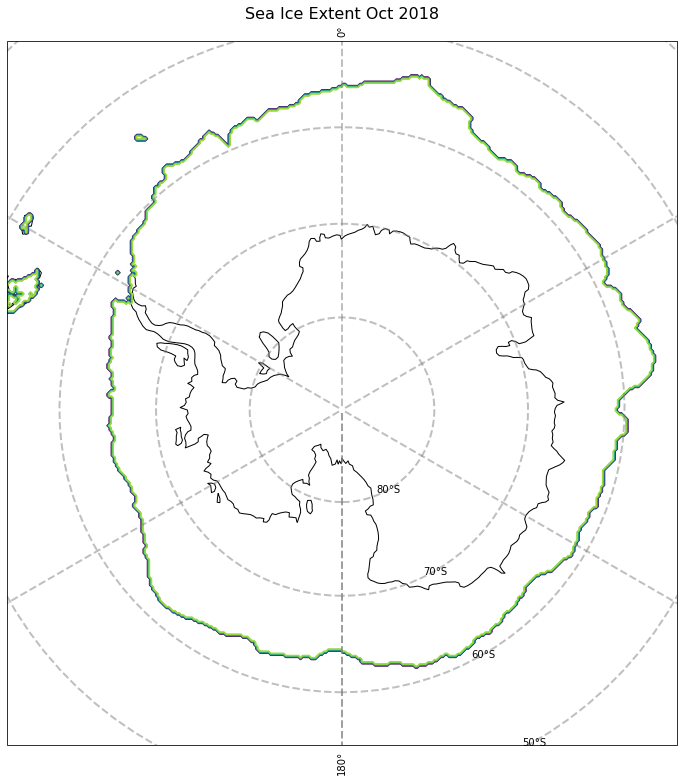

In [34]:
plt.figure(figsize=(12,13))

ax = plt.subplot(projection=ccrs.SouthPolarStereo())

plt.contour(
    toPlot.xgrid, 
    toPlot.ygrid, 
    toPlot,
    transform=ccrs.SouthPolarStereo(true_scale_latitude=-70),
    )

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)

ax.coastlines()

plt.title('Sea Ice Extent Oct 2018', fontsize=16)
plt.axes
plt.show()